In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('car_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.Car_Name.value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [7]:
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [8]:
df.Seller_Type.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [9]:
df.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

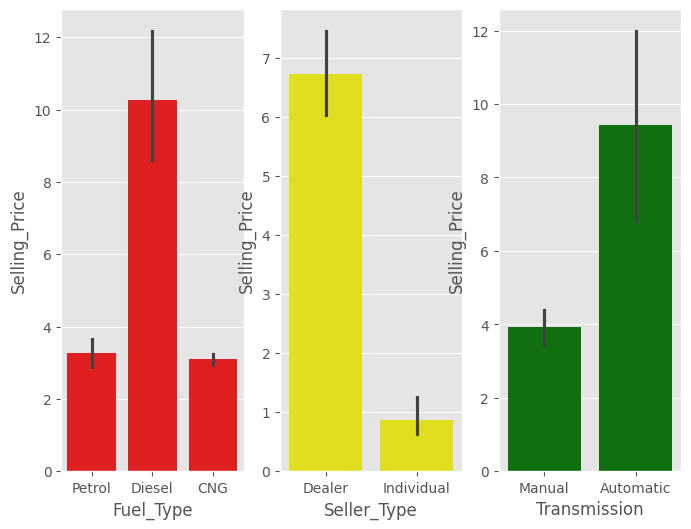

In [10]:
from matplotlib import style
import seaborn as sns
style.use('ggplot')
fig ,axs = plt.subplots(1,3 ,figsize=(8,6))
sns.barplot(x = 'Fuel_Type',y = 'Selling_Price', data = df , ax = axs[0] , color= 'r')
sns.barplot(x = 'Seller_Type',y = 'Selling_Price', data = df , ax = axs[1] , color= 'yellow')
sns.barplot(x = 'Transmission',y = 'Selling_Price', data = df , ax = axs[2], color= 'g' )
plt.show()

In [11]:
df.groupby('Fuel_Type').get_group('Petrol')


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
10,alto 800,2017,2.85,3.60,2135,Petrol,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0


In [12]:
df.groupby('Fuel_Type').get_group('Petrol').describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [13]:
df.groupby('Seller_Type').get_group('Dealer').describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2013.712821,6.721692,10.886308,39850.133333,0.020513
std,2.686275,5.136088,8.806563,24860.401003,0.142111
min,2003.000000,1.050000,2.690000,2071.000000,0.000000
25%,2012.000000,3.750000,6.580000,22148.500000,0.000000
50%,2014.000000,5.250000,8.500000,39485.000000,0.000000
75%,2016.000000,7.625000,13.460000,51785.500000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,1.000000


In [14]:
df.groupby('Transmission').get_group('Manual').describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2013.628352,3.931992,6.450383,34477.356322,0.038314
std,2.815445,3.777910,7.283720,26365.106104,0.192322
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.800000,1.200000,15001.000000,0.000000
50%,2014.000000,3.250000,5.800000,32000.000000,0.000000
75%,2016.000000,5.650000,9.400000,48000.000000,0.000000
max,2018.000000,35.000000,92.600000,213000.000000,1.000000


In [15]:
# turn category to int
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace =True)

df = pd.get_dummies(df,columns =['Seller_Type','Transmission'] , drop_first =True , dtype=int)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,1
297,brio,2015,4.00,5.90,60000,0,0,0,1
298,city,2009,3.35,11.00,87934,0,0,0,1
299,city,2017,11.50,12.50,9000,1,0,0,1


<Axes: >

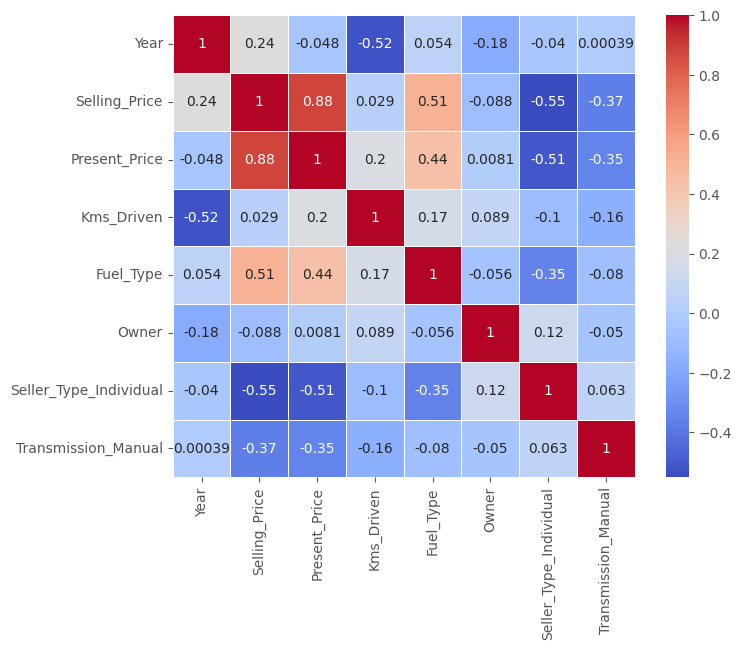

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop('Car_Name',axis=1).corr() , annot =True , linewidth=.5 ,cmap='coolwarm', square=True)

In [17]:
## ML part
X = df.drop(['Car_Name','Selling_Price'], axis = 1)
print(X.shape)
y = df['Selling_Price']
print(y.shape)

(301, 7)
(301,)


In [18]:
## 1. Split data
X_train, X_test , y_train , y_test = train_test_split(X,y , test_size =0.2)

print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(240, 7) (61, 7) (240,) (61,)


In [19]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [20]:
## 2.Train
model = LinearRegression() 
model.fit(X_train,y_train)

LinearRegression()

In [21]:
## 3. Score
model.score(X_train, y_train) # R-squared

0.8819236751545266

In [22]:
model.coef_  #slope

array([ 1.21253096,  4.01260875, -0.21881491,  0.60863068, -0.23248363,
       -0.55591703, -0.56898954])

In [23]:
model.intercept_  #Y-intercept

4.720333333333296

In [24]:
predictions = model.predict(X_test)
predictions

array([ 6.12199324,  4.45613376, -3.13388848, -1.52316454, -2.12184722,
        4.82262715,  8.42204511, -0.29178483,  2.23957064,  1.08234022,
        5.67301944,  9.04374542,  6.99886546, 19.17167017, -2.65889753,
        1.51753211,  7.57821601, 19.63924675,  3.51909148,  7.74392905,
       -1.43342361, 11.47552601, -0.45861483, 10.51671946,  3.06640469,
        5.16189856,  8.85490259,  8.2662599 ,  4.48509068, 12.14655057,
        7.57950258,  0.98221045,  3.2316568 ,  4.75059978,  5.14660545,
        8.36690657,  2.71710757, -1.58214917, 18.52634186,  7.3001491 ,
        1.92519459, -0.13082752,  4.67082157,  1.25847425,  1.23318262,
        4.68808526,  4.07473657,  9.86386356,  0.80903946, -1.48895634,
        9.32226807, -0.63209574, -1.08209127,  8.88265565,  0.942     ,
       10.78976993,  4.65075025,  1.97424918,  1.57796601, -2.54708118,
        9.75763999])

In [25]:
## 4. Evaluate

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f'   MAE   : {metrics.mean_absolute_error(predictions , y_test)}')
print(f'   MSE   : {metrics.mean_squared_error(predictions , y_test)}')
print(f'R2 score : {metrics.r2_score(predictions , y_test)}')
print(f'   RMSE  : {np.sqrt(metrics.mean_squared_error(predictions , y_test))}')


   MAE   : 1.4833493928964903
   MSE   : 3.96458384099756
R2 score : 0.8526932576967122
   RMSE  : 1.9911262744983202


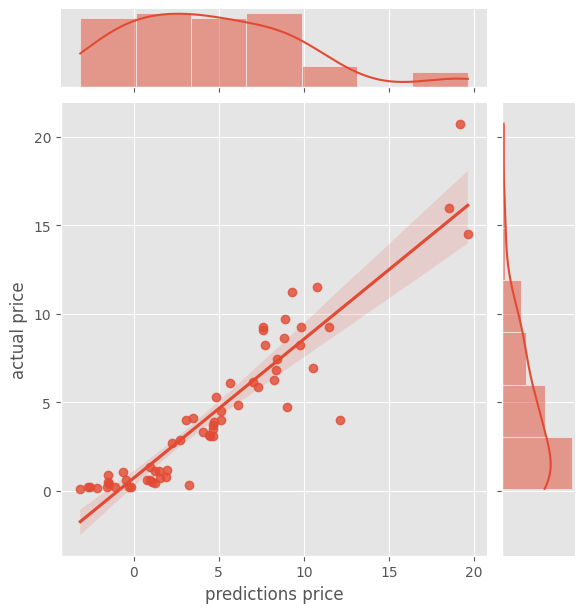

In [26]:
sns.jointplot(x = predictions, y = y_test, kind = 'reg' )
plt.ylabel('actual price')
plt.xlabel('predictions price')
plt.show()